In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageChops

In [2]:
train = pd.read_csv('/Users/kaivuxu/Downloads/mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
rownum=6875

In [4]:
if rownum > -1 and rownum < 60000:
    pixels = train.iloc[rownum][1:].values.reshape(28,28)
    array = np.array(pixels,dtype=np.uint8)
    img = Image.fromarray(array)
else:
    print('wrong')

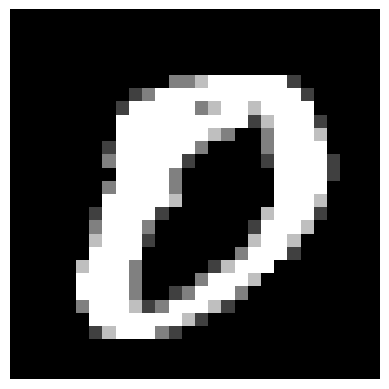

In [5]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [6]:
gray_img = img.convert('L')

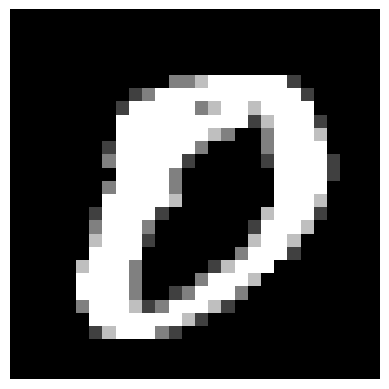

In [7]:
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

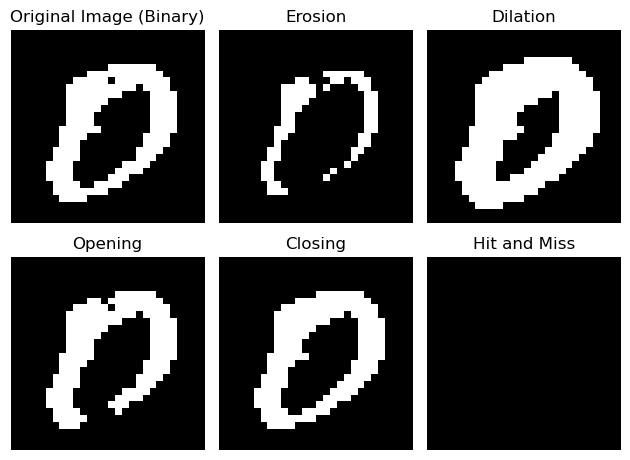

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage


img_array = np.array(gray_img)

# Convert to binary image (0 and 255)
binary_img = np.where(img_array > 128, 255, 0).astype(np.uint8)

# Display the original binary image
plt.subplot(2, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title("Original Image (Binary)")
plt.axis('off')

# Erosion operation (shrink objects)
erosion = ndimage.binary_erosion(binary_img).astype(np.uint8) * 255

# Display Erosion result
plt.subplot(2, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title("Erosion")
plt.axis('off')

# Dilation operation (expand objects)
dilation = ndimage.binary_dilation(binary_img).astype(np.uint8) * 255

# Display Dilation result
plt.subplot(2, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title("Dilation")
plt.axis('off')

# Opening operation (erosion followed by dilation)
opening = ndimage.binary_opening(binary_img).astype(np.uint8) * 255

# Display Opening result
plt.subplot(2, 3, 4)
plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.axis('off')

# Closing operation (dilation followed by erosion)
closing = ndimage.binary_closing(binary_img).astype(np.uint8) * 255

# Display Closing result
plt.subplot(2, 3, 5)
plt.imshow(closing, cmap='gray')
plt.title("Closing")
plt.axis('off')

# **Manual Hit-and-Miss Transformation**:
# We'll define the hit-and-miss using erosion with the structuring element and its complement.

# Define structuring element (example: a 3x3 cross shape)
selem = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

# Erode the binary image with the structuring element (foreground)
foreground = ndimage.binary_erosion(binary_img, structure=selem).astype(np.uint8)

# Erode the binary image with the complement of the structuring element (background)
background = ndimage.binary_erosion(255 - binary_img, structure=selem).astype(np.uint8)

# Perform Hit-and-Miss: foreground AND background
hit_and_miss = foreground & background

# Display Hit and Miss result
plt.subplot(2, 3, 6)
plt.imshow(hit_and_miss, cmap='gray')
plt.title("Hit and Miss")
plt.axis('off')

# Show the results
plt.tight_layout()
plt.show()
